In [1]:
%pip install -U matplotlib numpy pandas scipy scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns


In [52]:
def load_data(arvore_path):
    return pd.read_csv(arvore_path)

In [53]:
data = pd.read_csv('diabetes.csv')
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [54]:
df = load_data("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
# Separando os atributos (X) e o alvo (y)
X = data.drop('Age', axis=1) 
y = data['Age']  


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
tree_model_default = DecisionTreeRegressor(random_state=42)
tree_model_default.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
tree_model_max_depth = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model_max_depth.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [59]:
y_pred_default = tree_model_default.predict(X_test)
y_pred_max_depth = tree_model_max_depth.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse_default = mean_squared_error(y_test, y_pred_default)
mse_max_depth = mean_squared_error(y_test, y_pred_max_depth)

In [62]:
print("MSE do modelo com parâmetros padrão:", mse_default)
print("MSE do modelo com profundidade máxima limitada:", mse_max_depth)

MSE do modelo com parâmetros padrão: 174.92640692640694
MSE do modelo com profundidade máxima limitada: 99.37704556096784


In [63]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [72]:
tree_text_max_depth = export_text(tree_model_max_depth, feature_names=X.columns)
print("Árvore com Profundidade Máxima Limitada:\n", tree_text_max_depth)

Árvore com Profundidade Máxima Limitada:
 |--- Pregnancies <= 4.50
|   |--- Outcome <= 0.50
|   |   |--- SkinThickness <= 9.00
|   |   |   |--- value: [30.54]
|   |   |--- SkinThickness >  9.00
|   |   |   |--- value: [25.51]
|   |--- Outcome >  0.50
|   |   |--- SkinThickness <= 30.50
|   |   |   |--- value: [36.30]
|   |   |--- SkinThickness >  30.50
|   |   |   |--- value: [28.00]
|--- Pregnancies >  4.50
|   |--- Pregnancies <= 7.50
|   |   |--- Glucose <= 124.50
|   |   |   |--- value: [34.54]
|   |   |--- Glucose >  124.50
|   |   |   |--- value: [43.86]
|   |--- Pregnancies >  7.50
|   |   |--- BMI <= 30.45
|   |   |   |--- value: [49.42]
|   |   |--- BMI >  30.45
|   |   |   |--- value: [43.78]



In [73]:
tree_text_default = export_text(tree_model_default, feature_names=X.columns)
print("Árvore com Parâmetros Padrão:\n", tree_text_default)

Árvore com Parâmetros Padrão:
 |--- Pregnancies <= 4.50
|   |--- Outcome <= 0.50
|   |   |--- SkinThickness <= 9.00
|   |   |   |--- DiabetesPedigreeFunction <= 0.72
|   |   |   |   |--- BloodPressure <= 64.50
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.40
|   |   |   |   |   |   |--- BMI <= 22.05
|   |   |   |   |   |   |   |--- value: [25.00]
|   |   |   |   |   |   |--- BMI >  22.05
|   |   |   |   |   |   |   |--- BMI <= 30.85
|   |   |   |   |   |   |   |   |--- Pregnancies <= 3.50
|   |   |   |   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [21.00]
|   |   |   |   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.09
|   |   |   |   |   |   |   |   |   |   |--- BloodPressure <= 61.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- BloodPressure >  61.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2

In [83]:
feature_names_list = X.columns.tolist()

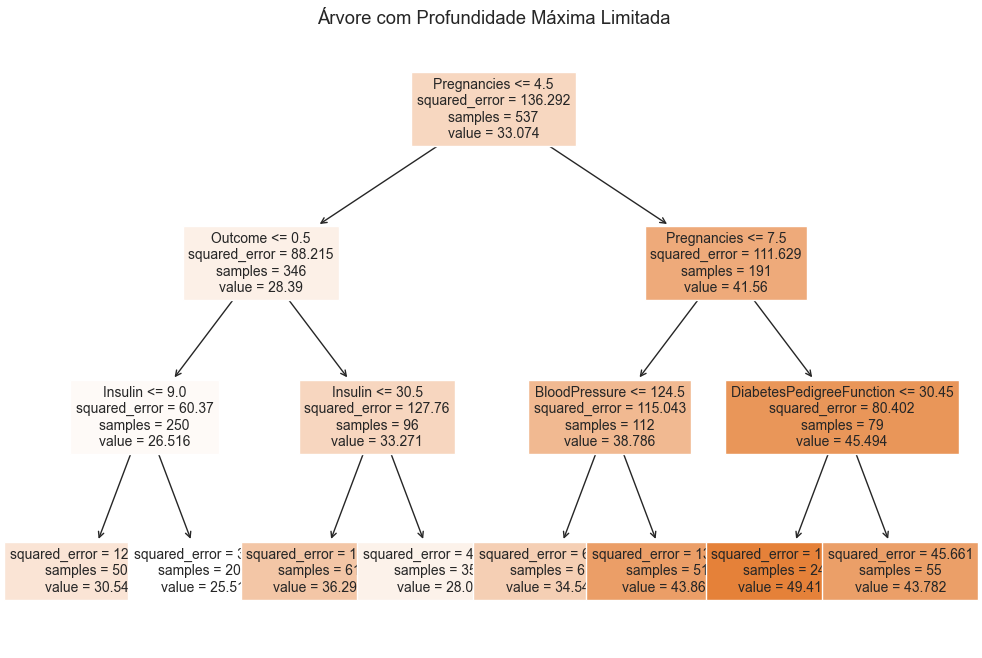

In [86]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model_max_depth, filled=True, feature_names=feature_names_list, fontsize=10)
plt.title("Árvore com Profundidade Máxima Limitada")
plt.show()

Use o conjunto de dados de diabetes link "https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset", foi dividido os dados em treinamento e teste, foi criado um modelo de árvore de decisão com profundidade máxima 3, foi feito previsões no conjunto de teste e avaliamos o desempenho usando o erro médio quadrático. Em seguida, exibimos a estrutura da árvore de decisão usando a função plot_tree do sklearn.tree.